# Notebook to analyze Scielo Data

In [1]:
# Boring but neccesary imports
%matplotlib inline
import matplotlib.pyplot as plt
import ingest_data 
import analyze
import networkx as nx

## Ingest the data into a data frame using the library

In [2]:
df = ingest_data.ingest_wos_scielo_folder()
print('Number of records ingested: ',len(df))

Encoding:  UTF-8-SIG
Number of records ingested:  15483


## Now unpack the data frame into dictionaries (authors, papers, institutions)
The output corresponds to fields with insufficient information to extract a country.
(tdl)This probably should go to a log file.

In [3]:
authors, papers, institutions = ingest_data.get_scielo_dicts(df)

Universidade Federal do Paraná not in datbase
Rashtrasant Tukadoji Maharaj Nagpur University not in datbase
LMC College of Pharmacy not in datbase
Universidad de Jaén not in datbase
Fundación Andaluza para la Integración Social del Enfermo Mental (FAISEM) not in datbase
Home Dialysis Center not in datbase
Mutua Accidentes de Canarias not in datbase
Ministerio de Salud Pública de Posadas-Misiones not in datbase
Escolas de Mafra not in datbase
Secretaria Municipal de Saúde not in datbase
Universidad del Valle not in datbase
Asociación Española not in datbase
Istituto di Ricerca Sociale GPF not in datbase
Universidade de Brasília not in datbase
Faculdades Nordeste not in datbase
Prefeitura Municipal de Natal not in datbase
Centro Universitário Unirg not in datbase
UNICAMP not in datbase
Centro de Hemodiálisis Baxter-RTS not in datbase
Universidad Nacional de Educación Abierta y a Distancia (UNAD) not in datbase
Instituto de Investigaciones Físicas not in datbase
Instituto de Investigacion

Universidade Estadual de Santa Cruz not in datbase
Universidade Regional de Blumenau not in datbase
Secretaria de Saúde do Estado da Bahia not in datbase
Centro Universitário de Maringá not in datbase
Hospital da CUF not in datbase
Instituto de Mayores y Servicios Sociales (IMSERSO) not in datbase
Centro de referencia Estatal para la Atención a Personas con Grave Discapacidad y para la Promoción de la autonomía Personal y Atención a la Dependencia not in datbase
Universidad Mayor de San Andrés not in datbase
Real y Pontificia San Francisco Xavier de Chuquisaca (UMRPSFXCh); Universidad Técnica de Oruro (UTO) not in datbase
Universidade de Marília not in datbase
King’s College London & the Institute of Psychiatry not in datbase
Ministerio del Poder Popular para la Educación y el Deporte not in datbase
Arquitectos Ltda not in datbase
Instituto Internacional de Nutrición de Plantas not in datbase
Centro Universitário Una not in datbase
BR not in datbase
Fiocruz not in datbase
Prefeitura Mu

Universidad Nacional del Litoral not in datbase
Universidad de Pennsylvania not in datbase
Universidad Nacional de Córdoba not in datbase
Fresenius Medical Care (Málaga) not in datbase
Hospital Regional Universitario de Málaga not in datbase
Instituto de Salud del Estado de México not in datbase
Universidade Fernando Pessoa not in datbase
IFSC not in datbase
ULS Matosinhos not in datbase
Complejo Hospitalario Universitario de A Coruña (CHUAC); Servizo Galego de Saude (SERGAS) not in datbase
Universidad de Guadalajara not in datbase
Consejo de Epidemiología y Prevención Cardiovascular Dr. Mario Ciruzzi not in datbase
Universidad de Sonora not in datbase
Benemérita Universidad Autónoma de Puebla not in datbase
Bosnia and Herzegovina not in datbase
Universidade Federal Rural da Amazônia not in datbase
Universidade Federal do Pará not in datbase
Hospital de Terrassa not in datbase
Basque Government not in datbase
Universidade de Brasilia-UnB not in datbase
Universidad Autónoma de Ciudad Ju

VITACOR not in datbase
Fundación Universitaria de Ciencias de la Salud not in datbase
Hospital de Braga not in datbase
Serviços de Oncologia Médica not in datbase
Hospital Central Sur not in datbase
Fundação Integrada Municipal de Ensino Superior not in datbase
Instituto Nacional de Psiquiatría Ramón de la Fuente not in datbase
Instituto de Biologia not in datbase
Université de Sud-Toulon Var not in datbase
Cerest not in datbase
Centro de Referência em Saúde do Trabalhador not in datbase
CLASP not in datbase
Universidade Federal do Rio Grande do Norte-UFRN not in datbase
Estación Experimental La Charca not in datbase
Instituto Politécnico Nacional - Unidad Durango not in datbase
Universidad Autónoma de Nuevo León not in datbase
Instituto Nacional de Psiquiatría Ramón de la Fuente (INPRFM) not in datbase
França not in datbase
Universidade Estadual do Norte do Paraná not in datbase
University of Massachusetts not in datbase
Universidad de La Laguna not in datbase
GIS not in datbase
Secre

EUA not in datbase
U.S.A not in datbase
U.K not in datbase
Universidad del Estado de Río de Janeiro not in datbase
Universidad de Santiago de Chile not in datbase
Estados Unidos Mexicanos not in datbase
Finlandia not in datbase
Department of Kinesiology not in datbase
Clínica Foscal Internacional y Clinica de Urgencia Bucaramanga not in datbase
Unidad Médica Clinilago not in datbase
IANIGLA-CCT not in datbase
Universidade do Norte do Paraná not in datbase
Instituto Nacional de Higiene Rafael Rangel not in datbase
Universidad Nacional del Sur not in datbase
INTA not in datbase
UNLPam not in datbase
UNSur not in datbase
Irán not in datbase
Universidad Rovira y Virgili not in datbase
Washington University in St. Louis not in datbase
Universidad de la República not in datbase
Laboratório Nacional de Engenharia Civil not in datbase
Universidade Federal do Rio de Janeiro not in datbase
Universidad Pública de Navarra. Campus Arrosadía. Pamplona. España not in datbase
Universidad Nacional de A

Centro Federal de Educação Tecnológica not in datbase
Instituto de Medicina Legal not in datbase
Instituto Nacional de Medicina Legal y Ciencias Forenses not in datbase
Faculdade Guairacá not in datbase
Red Iberoamericana de Masculinidades not in datbase
Instituto Superior de Arte not in datbase
U.K not in datbase
U.K not in datbase
Escola Arquipélago Fernando de Noronha not in datbase
Universidad Mayor de San Simon; UMSA not in datbase
Viceministerio de Ciencia y Tecnología not in datbase
Sociedad Boliviana de Física not in datbase
Asociación Boliviana para el Avance de la Ciencia not in datbase
Colegio Juan Enrique Pestalozzi not in datbase
Universidad Amazónica de Pando not in datbase
Universidad Autónoma Gabriel Rene Moreno not in datbase
Colegio Ave María not in datbase
Universidad Autónoma Tomas Frias not in datbase
Colegio Instituto Americano not in datbase
Colegio María Auxiliadora not in datbase
Universidad Mayor de San Simón not in datbase
Universidad Privada de Santa Cruz (U

Korea not in datbase
Caja Costarricense de Seguro Social not in datbase
Banco de Sangre del estado Zulia not in datbase
Sociedad Española de Medicina Rural y Generalista not in datbase
Sociedad Española de Arterioesclerosis not in datbase
Sociedad Europea de Cardiología not in datbase
Sociedad Española de Hipertensión not in datbase
Distrital de Salud de Bogotá not in datbase
División de Salud de la FES Social not in datbase
Prefeitura Municipal de Londrina not in datbase
Departamento de Periodismo de la Escuela de Comunicacion Social UCAB not in datbase
UPEL-IPB not in datbase
IUETAEB not in datbase
CREA not in datbase
Fundación Sanitária d'Igualada not in datbase
Hospital Universitario Miguel Servet not in datbase
Embrapa Gado de Corte not in datbase
Colégio e Faculdade not in datbase
IAC not in datbase
Rede Brasileira de Análise em Políticas Públicas not in datbase
Universidade do Estado de Mato Grosso not in datbase
FIOCRUZ not in datbase
Universidade de Cuiabá not in datbase
OMS n

Universidad Cooperativa de Colombia not in datbase
Egypt not in datbase
Universidad de Playa Ancha/USACH not in datbase
University of Las Palmas de Gran Canaria not in datbase
Universidad Autónoma de Guerrero (UAG) not in datbase
Universidade Federal de Ciências da Saúde de Porto Alegre (UFSCPA) not in datbase
Fundaçao Universitaria de Cardiología do Rio Grande do Sul not in datbase
Universidad Nacional de San Juan not in datbase
Estado de México not in datbase
Unilever Sur Europa not in datbase
Unilever España not in datbase
Centro de Investigación y Desarrollo de Medicamentos (Cidem) not in datbase
Universitat Autònoma de Barcelona not in datbase
Universidad del País Vasco not in datbase
BR not in datbase
University of Basque Country (UPV/EHU) not in datbase
University of Alicante not in datbase
University of Valencia not in datbase
University of Deusto not in datbase
Autonomus Universigy of Baja California not in datbase
Unicentro not in datbase
University of Vale do rio dos Sinos n

In [4]:
papers.keys()

dict_keys(['SCIELO:S0034-89102011000200014', 'SCIELO:S0034-89102011000200022', 'SCIELO:S0100-69912011000200007', 'SCIELO:S0120-386X2011000100007', 'SCIELO:S0104-11692011000200018', 'SCIELO:S1688-03902011000100004', 'SCIELO:S2007-09342011000200003', 'SCIELO:S1020-49892011000400007', 'SCIELO:S0185-33252011000200009', 'SCIELO:S1807-86212011000100023', 'SCIELO:S1678-86212011000100008', 'SCIELO:S1405-99402011000100004', 'SCIELO:S0004-27302011000200004', 'SCIELO:S1679-87592011000100004', 'SCIELO:S1984-82502011000100020', 'SCIELO:S0102-311X2011000300003', 'SCIELO:S0102-311X2011000300009', 'SCIELO:S0102-311X2011000300011', 'SCIELO:S1413-81232011000300035', 'SCIELO:S1657-95342011000100012', 'SCIELO:S1852-73372011000100005', 'SCIELO:S1665-70632011000100005', 'SCIELO:S1414-81452011000100005', 'SCIELO:S1809-29502011000100004', 'SCIELO:S1809-29502011000100005', 'SCIELO:S1809-29502011000100010', 'SCIELO:S0103-51502011000100017', 'SCIELO:S0103-51502011000100020', 'SCIELO:S1134-928X2011000100002', 'SC

In [5]:
papers[list(papers.keys())[0]]

{'title': 'Repercussão da exposição à violência por parceiro íntimo no comportamento dos filhos',
 'authors': ['Durand, Julia Garcia',
  'Schraiber, Lilia Blima',
  'França-Junior, Ivan',
  'Barros, Claudia'],
 'year': 2011,
 'spanish title': "Impact of exposure to intimate partner violence on children's behavior",
 'portuguese title': 'Repercusión de la exposición a la violencia por pareja íntima en el comportamiento de los hijos',
 'other language title': nan,
 'source': 'Revista de Saúde Pública',
 'language': 'Portuguese',
 'english author keywords': ['Student Dropouts',
  'Child Behavior',
  'Parent-Child Relations',
  'Violence Against Women'],
 'institutions': ['Universidade de São Paulo, Brazil']}

# Usage Examples

## Simple Stats

In [6]:
print('Number of authors: ',len(authors))
print(f'Number of publications: {len(papers):,}')
print(f'Number of institutions: {len(institutions):,}')

Number of authors:  45777
Number of publications: 15,483
Number of institutions: 8,464


In [7]:
country_list = [institutions[inst]['country'] for inst in institutions]
country_list = list(set(country_list))
country_list = sorted(country_list)

print(f'Number of countries: {len(country_list):,}')
print('Country List: ', country_list)

Number of countries: 68
Country List:  ['Angola', 'Argentina', 'Australia', 'Austria', 'Barbados', 'Belgium', 'Bolivia', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Finland', 'France', 'Germany', 'Greece', 'Guatemala', 'Guyana', 'Honduras', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Italy', 'Jamaica', 'Japan', 'Lithuania', 'Macedonia', 'Mali', 'Mexico', 'Mozambique', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'No country available', 'Norway', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Puerto Rico', 'Russia', 'Saudi Arabia', 'Serbia', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Turkey', 'USA', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Venezuela', 'Vietnam']


In [8]:
# Create an ordered list of authors and their number of published papers
auth_prod = [(author, len(authors[author]['papers_list']))
             for author in authors]
auth_prod = sorted(auth_prod, key=lambda x: x[1], reverse=True)

<IPython.core.display.Javascript object>


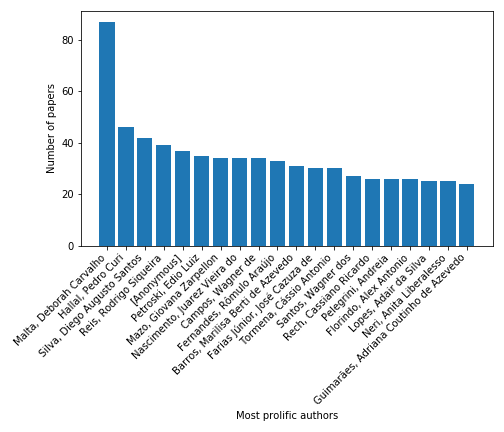

In [42]:
# Visualize the top 10 authors
%matplotlib notebook
n_authors = 20
top_authors = [author for (author,value) in auth_prod[0:n_authors]]
pubs_total  = [value for (author,value) in auth_prod[0:n_authors]]
authors_pos = [ i for i in range(n_authors)]

plt.rcParams['figure.figsize'] = [7, 6]
plt.bar(authors_pos, pubs_total)
plt.xticks(authors_pos, top_authors)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Most prolific authors')
plt.ylabel('Number of papers')
plt.tight_layout()
plt.show()

In [10]:
country_papers = ingest_data.get_country_papers_count(papers, institutions)

In [11]:
# Top countries
country_ranking = [(country, paper_number) for (country, paper_number) in country_papers.items()]
country_ranking = sorted(country_ranking, key=lambda x:x[1], reverse=True)

<IPython.core.display.Javascript object>


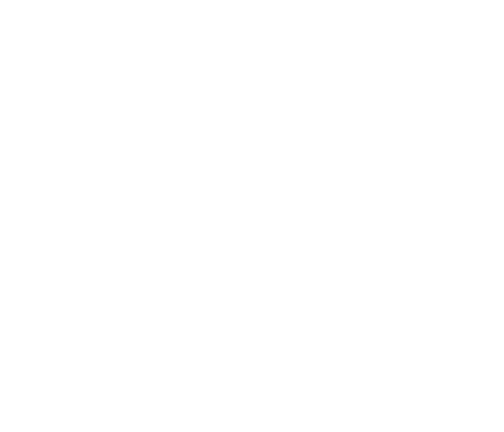

In [12]:
# Visualize the top 20 countries
%matplotlib notebook
n_countries = 20
top_countries = [item[0] for item in country_ranking[0:n_countries]]
pubs_total  =   [item[1]  for item in country_ranking[0:n_countries]]
country_pos = [ i for i in range(n_countries)]

plt.rcParams['figure.figsize'] = [7, 6]
plt.bar(country_pos, pubs_total)
plt.xticks(country_pos, top_countries)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Most prolific countries')
plt.ylabel('Number of papers')
plt.tight_layout()
plt.show()

In [13]:
country_ranking

[('Brazil', 8304),
 ('No country available', 1829),
 ('Spain', 1381),
 ('Colombia', 1220),
 ('Mexico', 919),
 ('Chile', 695),
 ('Portugal', 527),
 ('Cuba', 492),
 ('Argentina', 403),
 ('USA', 319),
 ('Venezuela', 221),
 ('Peru', 150),
 ('Costa Rica', 95),
 ('United Kingdom', 91),
 ('Ecuador', 86),
 ('Canada', 74),
 ('France', 68),
 ('Italy', 54),
 ('Uruguay', 50),
 ('Germany', 37),
 ('Australia', 34),
 ('Paraguay', 33),
 ('Iran', 26),
 ('Bolivia', 24),
 ('Turkey', 21),
 ('China', 21),
 ('Sweden', 17),
 ('India', 15),
 ('Serbia', 14),
 ('Belgium', 12),
 ('Switzerland', 11),
 ('Denmark', 10),
 ('Honduras', 9),
 ('Poland', 9),
 ('Greece', 8),
 ('Netherlands', 8),
 ('Japan', 8),
 ('Austria', 7),
 ('Croatia', 7),
 ('Norway', 7),
 ('Finland', 6),
 ('Russia', 6),
 ('Mozambique', 6),
 ('Macedonia', 6),
 ('Jamaica', 6),
 ('Guatemala', 6),
 ('Lithuania', 5),
 ('Nicaragua', 4),
 ('Nigeria', 4),
 ('South Africa', 3),
 ('Puerto Rico', 3),
 ('Angola', 3),
 ('Vietnam', 3),
 ('Slovenia', 3),
 ('Sri La

In [195]:
G_coauthors = analyze.get_coauthorship_graph(papers, authors, papers_filter=1)

Number of nodes  45777
Number of edges to add:  114684


In [ ]:
%matplotlib notebook
nx.draw(G_coauthors, with_labels=False)
plt.show()

<IPython.core.display.Javascript object>

In [16]:
#                     Upcoming code improvements 
# * Log file
# * Disambiguation 
# * Improved institution name 
# * Library structure (pip install kind of functionality)

In [17]:
164*163

26732

In [18]:
plt.show()